# Notes on Chapter 6 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_moons
import numpy as np
from matplotlib import pyplot as plt

## Iris dataset example

Load the iris dataset, limiting the features to petal length and width

In [2]:
iris = load_iris()
feature_names = iris.feature_names[2:]
target_names = iris.target_names
iris_X = iris.data[:,2:]
iris_y = iris.target
feature_names

['petal length (cm)', 'petal width (cm)']

Fit a decision tree classifier to the dataset

In [3]:
m = DecisionTreeClassifier(max_depth=3, random_state=42)
m.fit(iris_X, iris_y);

Show a diagram of the learned decision tree

In [4]:
from sklearn.tree import export_graphviz
import tempfile
from IPython.display import Image,display
import graphviz

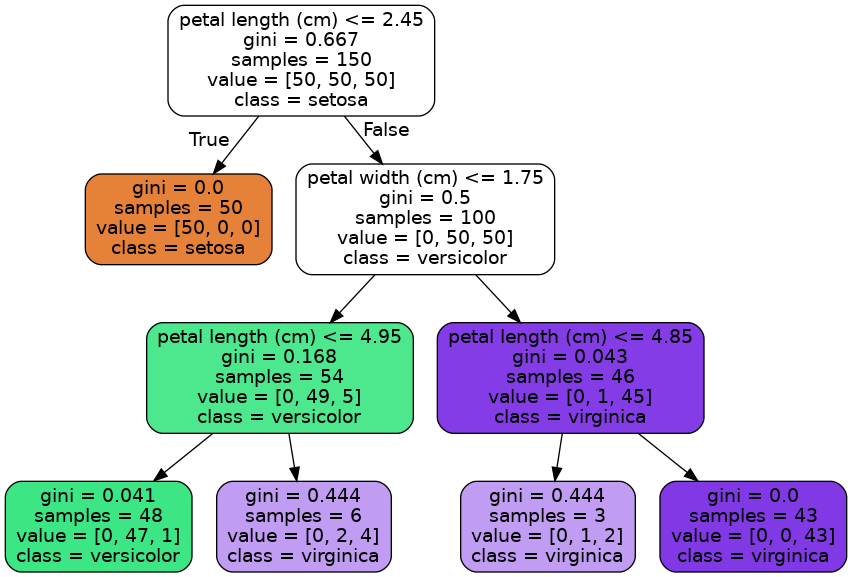

In [5]:
with tempfile.NamedTemporaryFile('w+t', suffix=".dot") as dotfile, \
        tempfile.NamedTemporaryFile('w+b', suffix=".png") as pngfile:
    export_graphviz(m, out_file=dotfile.name, feature_names=feature_names,
                    class_names=target_names, rounded=True, filled=True)
    graphviz.render(engine='dot', filepath=dotfile.name, outfile=pngfile.name)
    display(Image(pngfile.name))

Show the decision boundaries for the decision tree with the iris training dataset

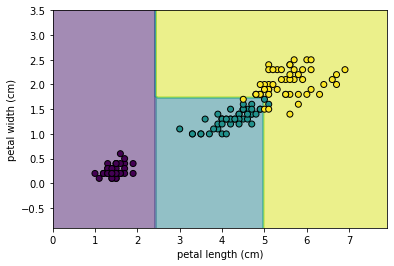

In [6]:
disp = DecisionBoundaryDisplay.from_estimator(m, iris_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, edgecolor="k")

## Moons dataset example

Generate data from the moons dataset

In [7]:
moons_X,moons_y = make_moons(noise=0.25, random_state=42)

Fit a decision tree to the moons dataset

In [8]:
m = DecisionTreeClassifier(random_state=42)
m.fit(moons_X, moons_y);

Show the decision boundaries for the decision tree with the moons training dataset

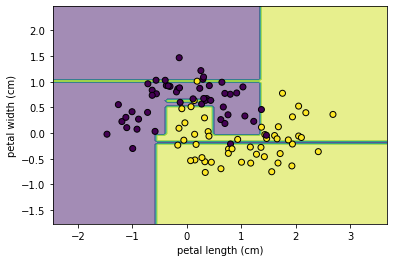

In [9]:
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, edgecolor="k")

Show the results when the model is instead constrained to contain a minimum number of points in each leaf

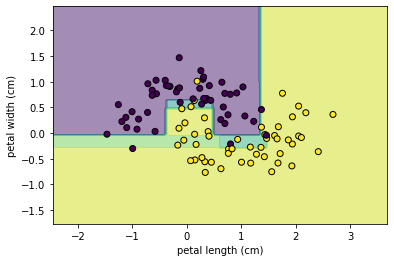

In [10]:
m = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
m.fit(moons_X, moons_y)
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, edgecolor="k")

## Noisy quadratic dataset example

Generate a quadratic function with some noise

In [11]:
n = 100
np.random.seed(42)
quad_X = np.random.uniform(size=(n,1))
quad_y = 4*(quad_X[:,0] - 0.5)**2 + 0.1*np.random.normal(size=n)

Fit a regression model to the quadratic

In [12]:
m = DecisionTreeRegressor(random_state=42)
m.fit(quad_X, quad_y);

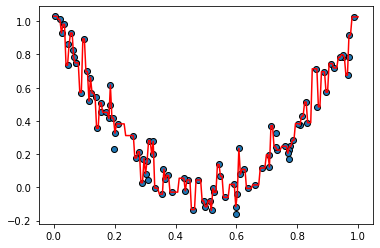

In [13]:
xvals = np.linspace(0,1,200)
plt.plot(xvals, m.predict(xvals[:,np.newaxis]), 'r')
plt.scatter(quad_X, quad_y, edgecolor="k")

As before, the degree of overfitting can be reduced by setting a minimum number of samples per leaf

In [14]:
m = DecisionTreeRegressor(min_samples_leaf=6, random_state=42)
m.fit(quad_X, quad_y);

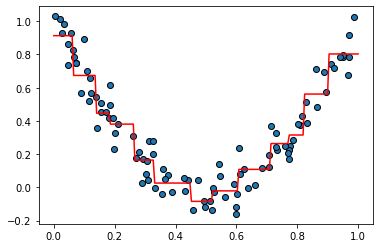

In [15]:
xvals = np.linspace(0,1,200)
plt.plot(xvals, m.predict(xvals[:,np.newaxis]), 'r')
plt.scatter(quad_X, quad_y, edgecolor="k")

## Instability

Rotation of the features can significantly change the prediction model

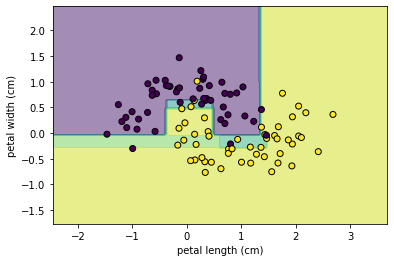

In [16]:
m = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
m.fit(moons_X, moons_y)
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_y, edgecolor="k")

In [17]:
theta = np.pi / 4
moons_rotX =  moons_X @ np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])

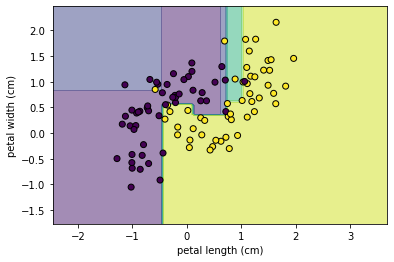

In [18]:
m = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
m.fit(moons_rotX, moons_y)
disp = DecisionBoundaryDisplay.from_estimator(m, moons_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(moons_rotX[:, 0], moons_rotX[:, 1], c=moons_y, edgecolor="k")

Even different initial random states (or small changes in the training data) can also lead to very different results

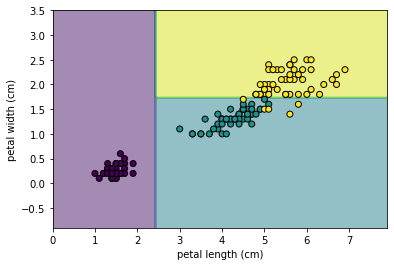

In [25]:
m = DecisionTreeClassifier(max_depth=2, random_state=42)
m.fit(iris_X, iris_y);
disp = DecisionBoundaryDisplay.from_estimator(m, iris_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, edgecolor="k")

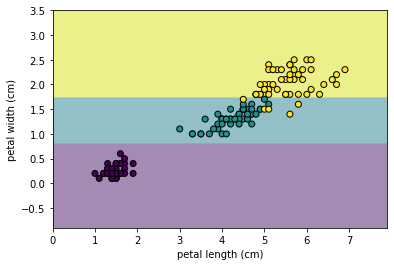

In [26]:
m = DecisionTreeClassifier(max_depth=2, random_state=1811)
m.fit(iris_X, iris_y);
disp = DecisionBoundaryDisplay.from_estimator(m, iris_X,
    xlabel=feature_names[0], ylabel=feature_names[1], alpha=0.5)
disp.ax_.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, edgecolor="k")